- The main idea of decison tree is ***Binary Recursive Partitioning***

### Decision Tree and Terms Associated
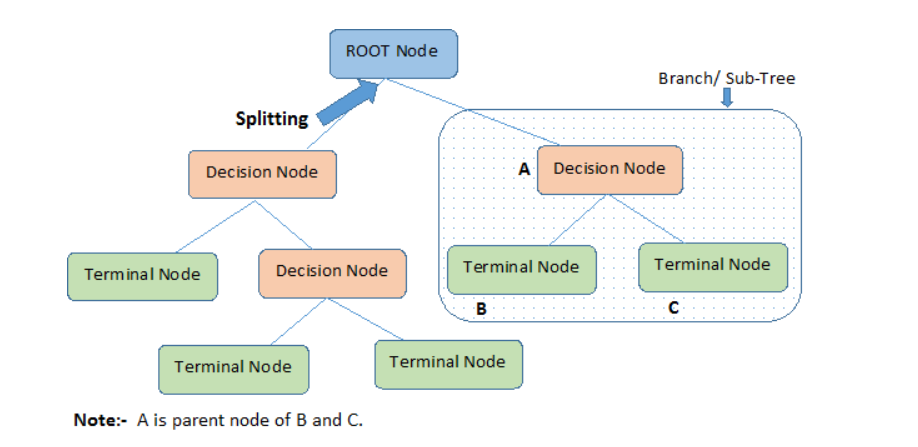

#### Terms
 - **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
 - **Splitting**: It is a process of dividing a node into two or more sub-nodes.
 - **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.
 - **Leaf/ Terminal Node**: Nodes with no children (no further split) is called Leaf or Terminal node.
 - **Pruning**: When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
 - **Branch / Sub-Tree**: A sub section of decision tree is called branch or sub-tree.
 - **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

### Algorithm used in decision trees
 - Core tree based algos
  - ***ID3***
  - ***C4.5***
  - ***C5.0***
  - ***CART models***
 - **ID3**
  - The core algorithm for building decision trees is called ID3.ID3 uses Entropy and Information Gain to construct a decision tree.
 - **Gini Index**
  - Gini index says, if we select two items from a population at random then they must be of same class and probability for this  is 1 if population is pure.
  - It works with categorical target variable “Success” or “Failure”.
  - It performs only Binary splits
  - Higher the value of Gini higher the homogeneity.
  - CART (Classification and Regression Tree) uses Gini method to create binary splits.
 - **Steps to Calculate Gini for a split**
  - Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p²+q²).
  - Calculate Gini for split using weighted Gini score of each node of that split

### Gini Calculations
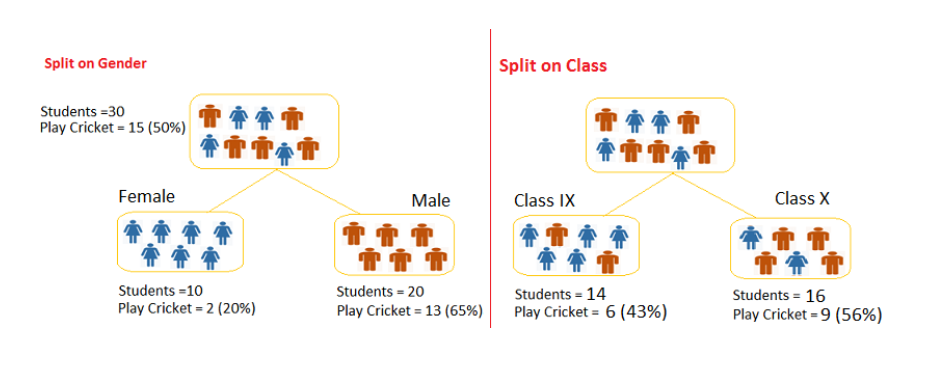
- **Split on Gender**:
 - Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68
 - Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
 - Weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59
- **Similar for Split on Class**:
 - Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51
 - Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51
 - Weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51
 
- **Note**:Above, you can see that **Gini score for Split on Gender is higher** than Split on Class, hence, the node split will take place on Gender.

### How Decision Tree Looks Like :)

In [4]:
import sklearn.datasets as datasets
import pandas as pd

iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\LOKESH\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


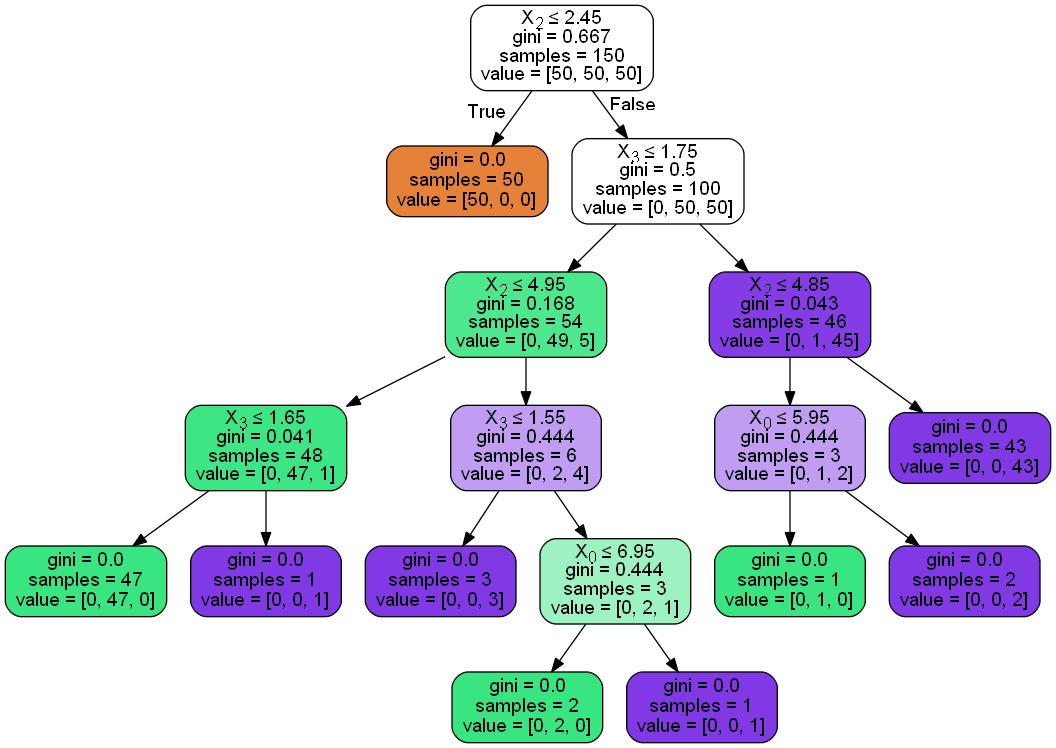

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Lets Talk About Details Of Decision Tree


- **key Measures**
 - Entropy (Ranges between 0 and 1) - takes very long time to compute so, computaionally expensive
 - Gini Index (Ranges between 0 and 0.5) - computationally effective and fast
 - Information Gain

### Entropy

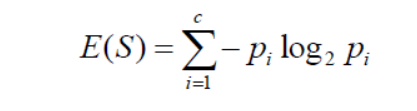
- P = probability

- entropy value of a impure split
 - suppose you have a node with (5,5) impurity
 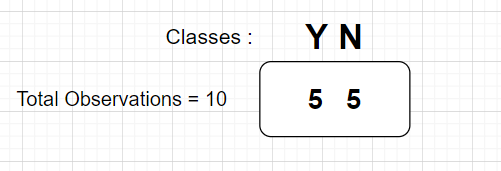
 
 - find entropy value:
  - E(left) = -(5/10) log2 (5/10)
  - E(right) = -(5/10) log2 (5/10)
  - Total entropy = E(left) + E(right) = 1
  
- entropy value of a pure split
 - suppose you have a node with (5,0) purity
 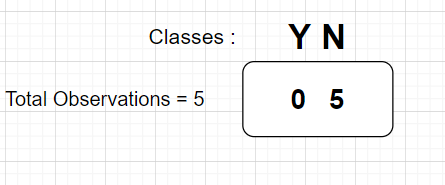
 
  - find entropy value:
  - E(left) = -(0/5) log2 (0/5)
  - E(right) = -(5/5) log2 (5/5)
  - Total entropy = E(left) + E(right) = 0
 

### Gini Index

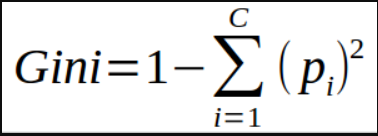
- p = probability

- gini index value of a impure split
 - suppose you have a node with (5,5) impurity
 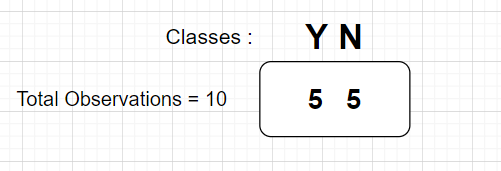
 
 - find gini value:
  - gini = 1 - (5/10)^2 - (5/10)^2 = 0.5
  
- entropy value of a pure split
 - suppose you have a node with (5,0) purity
 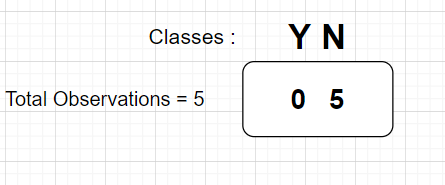
 
 - find gini value:
  - gini = 1 - (0/5)^2 - (5/5)^2 = 0

### Entropy vs Gini Index

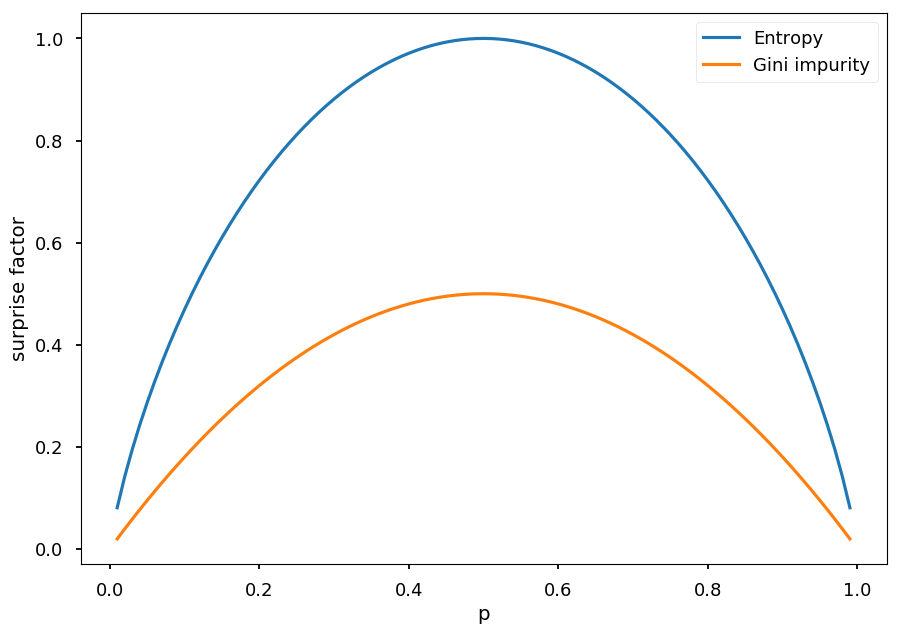

### which variable should do the first cut / split as root node or parent node
### what is the splitting criteria of parent node


- lets do an example
 - say you have 10 observations and 5 attributes like (x1, x2, x3, x4, x5)


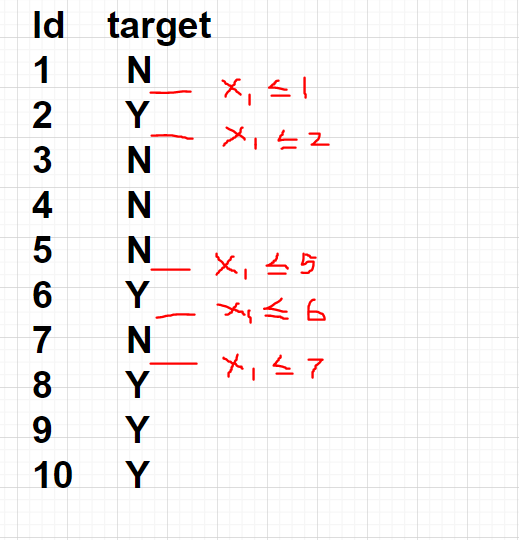

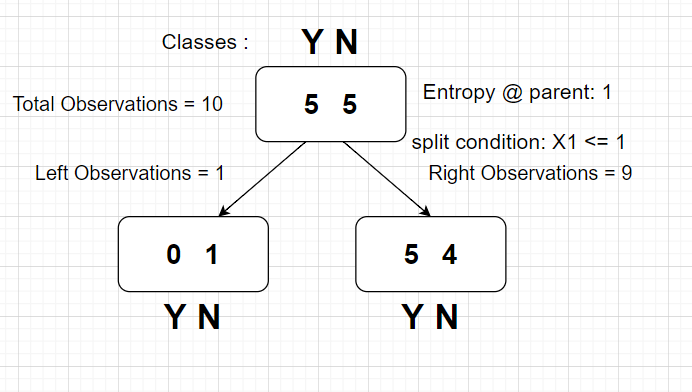
- Entropy at left child node = -(0/1) log2 (0/1)-(1/1) log2 (1/1) = 0
- Entropy at right child node = -(5/9) log2 (5/9)-(4/9) log2 (4/9)  = 0.9
- weighted entropy at X1<= 1 or split branch 
  - E (left) * (no. of observations on leftside/ total observation) + E (right) * (no. of observations on rightside/ total observation) 
  - (0 * 1/10) + (0.9 * 9/10 ) = 0.8
  - **Information Gain**
   - IG = Entropy of parent node - Weighted entropy of child node
        = 1 - 0.8 = 0.2
        
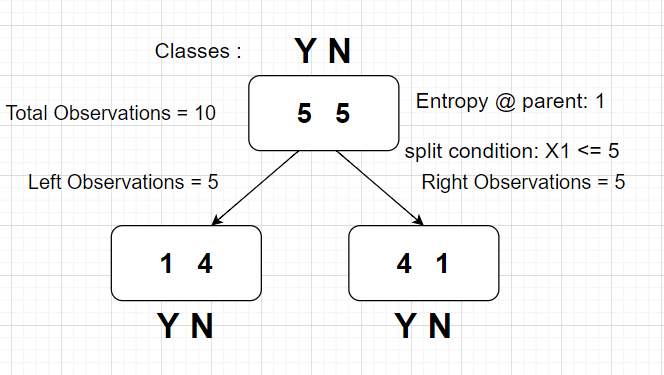
- Entropy at left child node = -(1/5) log2 (1/5)-(4/5) log2 (4/5) = 0.2
- Entropy at right child node =  -(1/5) log2 (1/5)-(4/5) log2 (4/5) = 0.2
- weighted entropy at X1<= 5 or split branch 
  - E (left) * (no. of observations on leftside/ total observation) + E (right) * (no. of observations on rightside/ total observation) 
  - (0.2 * 5/10) + (0.2 * 5/10 ) = 0.2
  - **Information Gain**
   - IG = Entropy of parent node - Weighted entropy of child node
        = 1 - 0.2 = 0.8
        
### Splitting Criterian

- you have to do this process for all input attributes untill it met with splitting criteria which is the one attribute responsible for first cut or split is the one who has **high information gain and low entropy**        